In [33]:
import pmdarima as pm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error

import datetime


In [4]:
fData = pd.read_csv('../../preprocessed_data/[1분 단위]아파트_동별_소비전력_전력분배_2022-07-18 00.00.00~2023-08-30 10.39.00.csv',usecols=[1,2,3,4])

fData["CONSUMPTION(kWh)"] = (fData["561_CONSUMPTION(kW)"] + fData["562_CONSUMPTION(kW)"] + fData["563_CONSUMPTION(kW)"]) / 60
fData.drop(["561_CONSUMPTION(kW)", "562_CONSUMPTION(kW)", "563_CONSUMPTION(kW)"], axis = 1, inplace =True)

fData['TIMESTAMP'] = pd.to_datetime(fData['TIMESTAMP'])

fData.set_index('TIMESTAMP', inplace=True)
fData = fData[:127800]
fData

,CONSUMPTION(kWh)
TIMESTAMP,
2022-07-18 00:00:00,2.804928
2022-07-18 00:01:00,2.870073
2022-07-18 00:02:00,2.867803
2022-07-18 00:03:00,2.856863
2022-07-18 00:04:00,2.794600
...,...
2022-10-14 17:55:00,2.590188
2022-10-14 17:56:00,2.488765
2022-10-14 17:57:00,2.686760


In [5]:
fData = fData.loc['2022-07-18 00:00:00': '2022-08-31 23:59:00']

train_df = fData[:int(len(fData) * 0.9)]
test_df = fData[int(len(fData) * 0.9):]

train_df

,CONSUMPTION(kWh)
TIMESTAMP,
2022-07-18 00:00:00,2.804928
2022-07-18 00:01:00,2.870073
2022-07-18 00:02:00,2.867803
2022-07-18 00:03:00,2.856863
2022-07-18 00:04:00,2.794600
...,...
2022-08-27 11:55:00,2.338498
2022-08-27 11:56:00,2.406365
2022-08-27 11:57:00,2.324193


In [6]:
train_df.describe()

,CONSUMPTION(kWh)
count,58320.000000
mean,2.954095
std,0.801433
min,1.297250
25%,2.277668
50%,2.892312
75%,3.738450
max,4.192960


In [7]:
def get_ndiff(train):
    kpss_diffs = pm.arima.ndiffs(train, alpha=0.05, test='kpss', max_d=6)
    adf_diffs = pm.arima.ndiffs(train, alpha=0.05, test='adf', max_d=6)
    return max(adf_diffs, kpss_diffs)

In [8]:
def forecast_one_step(model):
    fc, conf_int = model.predict(n_periods=1 
        , return_conf_int=True)              
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [9]:
index_100 = test_df.index[:100]
index_100

DatetimeIndex(['2022-08-27 12:00:00', '2022-08-27 12:01:00',
               '2022-08-27 12:02:00', '2022-08-27 12:03:00',
               '2022-08-27 12:04:00', '2022-08-27 12:05:00',
               '2022-08-27 12:06:00', '2022-08-27 12:07:00',
               '2022-08-27 12:08:00', '2022-08-27 12:09:00',
               '2022-08-27 12:10:00', '2022-08-27 12:11:00',
               '2022-08-27 12:12:00', '2022-08-27 12:13:00',
               '2022-08-27 12:14:00', '2022-08-27 12:15:00',
               '2022-08-27 12:16:00', '2022-08-27 12:17:00',
               '2022-08-27 12:18:00', '2022-08-27 12:19:00',
               '2022-08-27 12:20:00', '2022-08-27 12:21:00',
               '2022-08-27 12:22:00', '2022-08-27 12:23:00',
               '2022-08-27 12:24:00', '2022-08-27 12:25:00',
               '2022-08-27 12:26:00', '2022-08-27 12:27:00',
               '2022-08-27 12:28:00', '2022-08-27 12:29:00',
               '2022-08-27 12:30:00', '2022-08-27 12:31:00',
               '2022-08-

In [14]:
fcast2

TIMESTAMP
2022-08-27 12:00:00   NaN
2022-08-27 12:01:00   NaN
2022-08-27 12:02:00   NaN
2022-08-27 12:03:00   NaN
2022-08-27 12:04:00   NaN
                       ..
2022-08-27 13:35:00   NaN
2022-08-27 13:36:00   NaN
2022-08-27 13:37:00   NaN
2022-08-27 13:38:00   NaN
2022-08-27 13:39:00   NaN
Name: Auto Arima, Length: 100, dtype: float64

In [17]:
train_df

,CONSUMPTION(kWh)
TIMESTAMP,
2022-07-18 00:00:00,2.804928
2022-07-18 00:01:00,2.870073
2022-07-18 00:02:00,2.867803
2022-07-18 00:03:00,2.856863
2022-07-18 00:04:00,2.794600
...,...
2022-08-27 11:55:00,2.338498
2022-08-27 11:56:00,2.406365
2022-08-27 11:57:00,2.324193


In [27]:
model.predict(100).values

array([2.56326785, 2.55122447, 2.54445904, 2.54065851, 2.53852355,
       2.53732422, 2.53665049, 2.53627202, 2.53605942, 2.53593998,
       2.53587289, 2.5358352 , 2.53581403, 2.53580213, 2.53579545,
       2.5357917 , 2.53578959, 2.53578841, 2.53578774, 2.53578737,
       2.53578716, 2.53578704, 2.53578697, 2.53578694, 2.53578691,
       2.5357869 , 2.5357869 , 2.53578689, 2.53578689, 2.53578689,
       2.53578689, 2.53578689, 2.53578689, 2.53578689, 2.53578689,
       2.53578689, 2.53578689, 2.53578689, 2.53578689, 2.53578689,
       2.53578689, 2.53578689, 2.53578689, 2.53578689, 2.53578689,
       2.53578689, 2.53578689, 2.53578689, 2.53578689, 2.53578689,
       2.53578689, 2.53578689, 2.53578689, 2.53578689, 2.53578689,
       2.53578689, 2.53578689, 2.53578689, 2.53578689, 2.53578689,
       2.53578689, 2.53578689, 2.53578689, 2.53578689, 2.53578689,
       2.53578689, 2.53578689, 2.53578689, 2.53578689, 2.53578689,
       2.53578689, 2.53578689, 2.53578689, 2.53578689, 2.53578

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-4820.598, Time=1.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4639.431, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4721.470, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4748.281, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4641.391, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-4813.787, Time=0.68 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-4814.172, Time=0.86 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-4816.705, Time=1.00 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-4816.914, Time=1.93 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4815.568, Time=0.56 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-4815.237, Time=0.97 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-4815.330, Time=0.81 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-4816.914, Time=1.53 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-4822.613, Time=0.38 sec
 ARIMA(1,1,2)(0,0,0

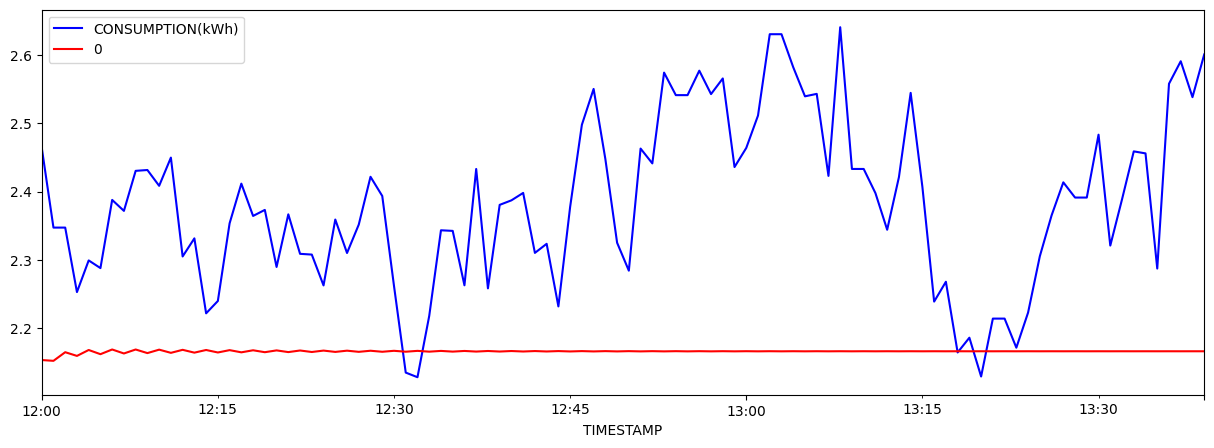

In [32]:
model = pm.auto_arima(train_df.iloc[:2000], seasonal=False, trace=True)

fcast2 = pd.DataFrame(model.predict(100).values, index=index_100)

fig, ax = plt.subplots(figsize=(15,5))
test_df.iloc[:100].plot(ax=ax, color='blue', legend=True)
fcast2.plot(ax=ax, color='red', legend=True)


print(mean_absolute_percentage_error(test_df.iloc[:100].values, fcast2.values))

Best window size for smallest MAPE is 4200, then MAPE is 0.012854876810801602


C:\Users\jaedongim\AppData\Local\Temp\ipykernel_26128\3601096918.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]


<Axes: xlabel='TIMESTAMP'>

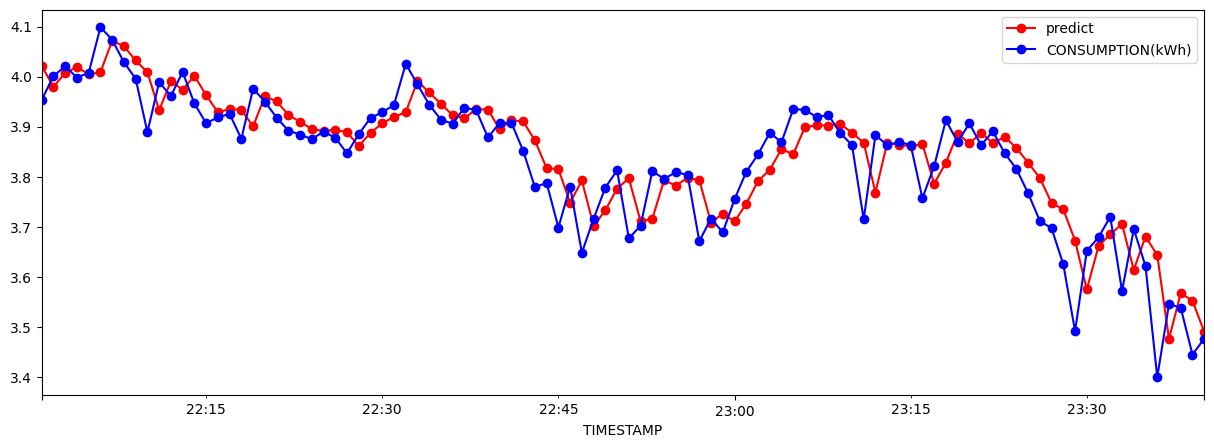

In [86]:
DAY_UNIT = 60 * 24

CHECK_SIZE = 100
min_mape = float('inf')
best_window_size = float('inf')

mapes = list()

MAX_STEP = 5*DAY_UNIT+1

for window_size in range(100, MAX_STEP, 100):
    end_time = train_df.index[0] + window_size * datetime.timedelta(minutes=1)
    train = train_df[:end_time]
    valid = train_df[end_time + datetime.timedelta(minutes=1) : end_time + CHECK_SIZE * datetime.timedelta(minutes=1)]

    model = pm.auto_arima(train, d=get_ndiff(train), seasonal=False)

    fcast = []
    for row in valid.itertuples():
        fcast.extend(model.predict(n_periods=1))

        model.update(row[1])

    mape = mean_absolute_percentage_error(valid.values, fcast)
    mapes.append(mape)

    if mape < min_mape :
        min_mape = mape
        best_window_size = window_size


print(f'Best window size for smallest MAPE is {best_window_size}, then MAPE is {min_mape}')

end_time = train_df.index[0] + best_window_size * datetime.timedelta(minutes=1)
train = train_df[:end_time]
valid = train_df[end_time + datetime.timedelta(minutes=1) : end_time + CHECK_SIZE * datetime.timedelta(minutes=1)]

model = pm.auto_arima(train, d=get_ndiff(train), seasonal=False)

fcast = []
for row in valid.itertuples():
    f = model.predict(n_periods=1)[0]
    fcast.append(f)

    model.update(row[1])

mape = mean_absolute_percentage_error(valid.values, fcast)

fcast = pd.DataFrame({'predict':fcast}, index=valid.index)

fig, ax = plt.subplots(figsize=(15,5))
fcast.plot(ax=ax, color='red', marker="o", legend=True)
valid.plot(ax=ax, color='blue', marker="o", legend=True)    

Best window size for smallest MAPE is 1200, then MAPE is 0.01602726211269351


C:\Users\jaedongim\AppData\Local\Temp\ipykernel_26128\3649085553.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = model.predict(n_periods=1)[0]


<Axes: xlabel='TIMESTAMP'>

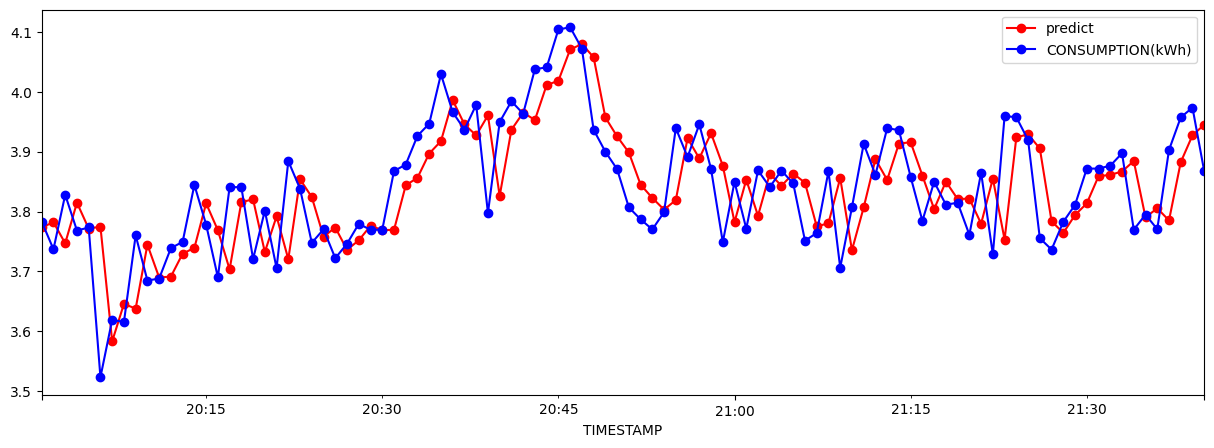

In [94]:
DAY_UNIT = 60 * 24

CHECK_SIZE = 100
min_mape = float('inf')
best_window_size = float('inf')

mapes = list()

MAX_STEP = 1*DAY_UNIT+1

for window_size in range(100, MAX_STEP, 100):
    end_time = train_df.index[0] + window_size * datetime.timedelta(minutes=1)
    train = train_df[:end_time]
    valid = train_df[end_time + datetime.timedelta(minutes=1) : end_time + CHECK_SIZE * datetime.timedelta(minutes=1)]

    model = pm.auto_arima(train, d=get_ndiff(train), seasonal=False)

    fcast = []
    for row in valid.itertuples():
        fcast.extend(model.predict(n_periods=1))

        model.update(row[1])

    mape = mean_absolute_percentage_error(valid.values, fcast)
    mapes.append(mape)

    if mape < min_mape :
        min_mape = mape
        best_window_size = window_size


print(f'Best window size for smallest MAPE is {best_window_size}, then MAPE is {min_mape}')

end_time = train_df.index[0] + best_window_size * datetime.timedelta(minutes=1)
train = train_df[:end_time]
valid = train_df[end_time + datetime.timedelta(minutes=1) : end_time + CHECK_SIZE * datetime.timedelta(minutes=1)]

model = pm.auto_arima(train, d=get_ndiff(train), seasonal=False)

fcast = []
for row in valid.itertuples():
    f = model.predict(n_periods=1)[0]
    fcast.append(f)

    model.update(row[1])

mape = mean_absolute_percentage_error(valid.values, fcast)

fcast = pd.DataFrame({'predict':fcast}, index=valid.index)

fig, ax = plt.subplots(figsize=(15,5))
fcast.plot(ax=ax, color='red', marker="o", legend=True)
valid.plot(ax=ax, color='blue', marker="o", legend=True)    

<Axes: >

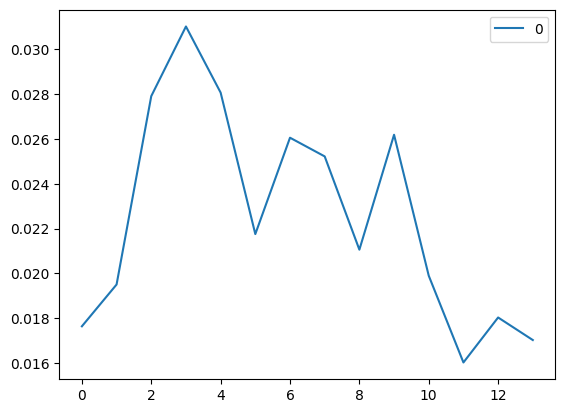

In [95]:
pd.DataFrame(mapes).plot()

<Axes: >

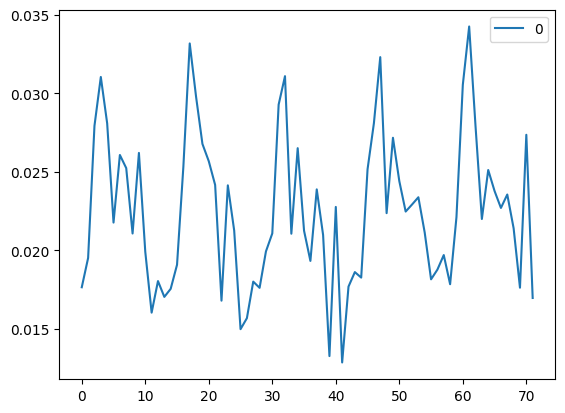

In [87]:
pd.DataFrame(mapes).plot()

0.014790346438765343


<Axes: >

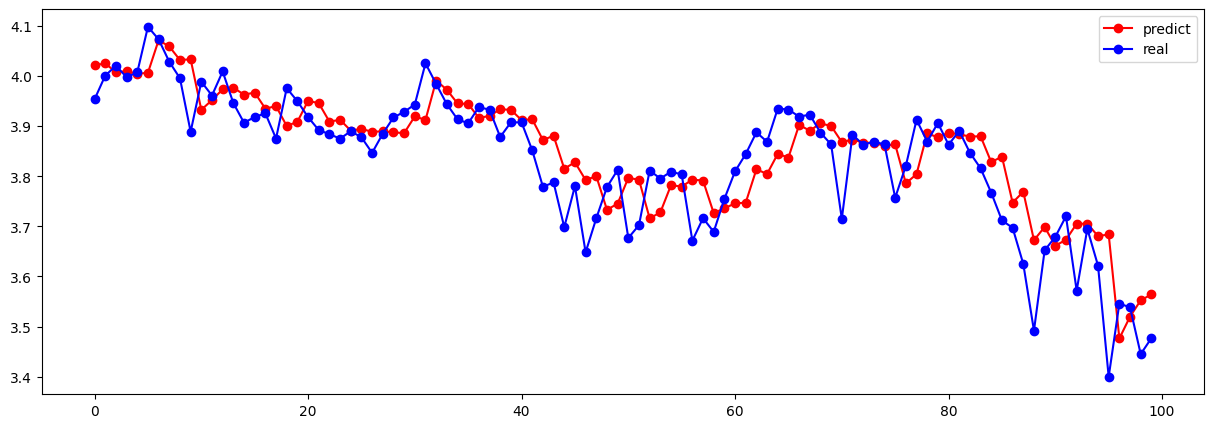

In [93]:
CHECK_SIZE = 100

end_time = train_df.index[0] + best_window_size * datetime.timedelta(minutes=1)
train = train_df[:end_time]
valid = train_df[end_time + datetime.timedelta(minutes=1) : end_time + CHECK_SIZE * datetime.timedelta(minutes=1)]

model = pm.auto_arima(train, d=get_ndiff(train), seasonal=False)

fcast = []
cnt = 0
for row in valid.itertuples():
    if cnt % 2 == 0:
        f = model.predict(n_periods=2)
        fcast.extend(f)

    model.update(row[1])
    cnt += 1

mape = mean_absolute_percentage_error(valid.values, fcast)
print(mape)

fcast = pd.DataFrame({'predict':fcast})
valids = pd.DataFrame({'real' : valid.values.reshape(-1)})

fig, ax = plt.subplots(figsize=(15,5))
fcast.plot(ax=ax, color='red', marker="o", legend=True)
valids.plot(ax=ax, color='blue', marker="o", legend=True)    

In [96]:
pm.auto_arima(train, d=get_ndiff(train), seasonal=False)

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
forecasts = []
pred = []
pred_upper = []
pred_lower = []

for i,row in valid.iterrows():
    fc, conf = forecast_one_step()
    pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    model.update(row[0])

In [ ]:
pd.DataFrame(mapes).plot()